# Project 4, APS1070 Winter 2022
#### **Linear Regression -  14 points**
**Deadline: April 1st, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: STEVEN XIE ZUOQI
*   Your **student number**: 998979627



### How to submit **(HTML [This notebook] + IPYNB + GitHub [Part 7])**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.

7. Make sure you compeleted the last part on <font color='red'>**GitHub**</font> and added your link to the last cell here. The teaching team will view and grade your part 7 on GitHub.



Ref: https://stackoverflow.com/a/64487858 



## Part 1 - Getting Started [1 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

Answer:

Iterations is the number of batches of data the algorithm has seen (or simply the number of passes the algorithm has done on the dataset).


Epochs is the number of times a learning algorithm sees the complete dataset. Now, this may not be equal to the number of iterations, as the dataset can also be processed in mini-batches, in essence, a single pass may process only a part of the dataset. In such cases, the number of iterations is not equal to the number of epochs.


In the case of Batch gradient descent, the whole batch is processed on each training pass. Therefore, the gradient descent optimizer results in smoother convergence than Mini-batch gradient descent, but it takes more time. The batch gradient descent is guaranteed to find an optimum if it exists.


Stochastic gradient descent is a special case of mini-batch gradient descent in which the mini-batch size is 1.


In [2]:
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,...,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,...,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [3]:
X = df.loc[:,df.columns !='Goal']
y = df['Goal']

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 1)
X_val, X_test, y_val, y_test = train_test_split(X_val,y_val, test_size = 0.5, random_state = 1)
X_train.shape,X_val.shape,X_test.shape,y_train.shape, y_test.shape, y_val.shape

((9625, 40), (2062, 40), (2063, 40), (9625,), (2063,), (2062,))

In [5]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.fit_transform(X_val)
X_test_std = scaler.fit_transform(X_test)

In [6]:
X_train

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
11843,-106,-36,-0.03,-0.05,0.60,0.9,-7,6,0.001,-0.1,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.017
443,-271,-48,-0.54,0.20,0.97,0.1,-18,-6,0.004,-0.1,...,0.0,0.0,0.0,0.0,-0.002,0.0,-0.003,0.0,0.7,0.026
13326,-305,-8,-0.18,0.05,0.82,-0.5,-10,-11,-0.013,2.1,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.6,0.020
5235,374,17,0.25,0.33,0.28,0.1,-10,-26,-0.041,-2.4,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.6,0.022
1552,252,-32,0.56,0.02,0.23,-0.4,-10,17,0.015,-0.9,...,0.0,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.4,0.017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-33,-5,-0.13,0.02,0.52,-0.6,-10,5,-0.001,-0.7,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.017
5192,235,-17,-0.27,0.14,0.63,0.7,-7,1,-0.007,-2.4,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.9,0.031
12172,16,33,0.49,0.28,0.66,0.4,-21,-7,-0.011,-0.7,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.7,0.025
235,377,11,-0.41,-0.04,0.13,0.7,-6,13,-0.002,-1.9,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.017


In [7]:
one_train = np.ones(np.shape(y_train))
df_X_train_std = pd.DataFrame(X_train_std)
df_X_train_std.columns = X_train.columns
df_X_train_std.insert(loc = 0, column = '1',value = one_train)
one_test = np.ones(np.shape(y_test))
df_X_test_std = pd.DataFrame(X_test_std)
df_X_test_std.columns = X_test.columns
df_X_test_std.insert(loc = 0, column = '1',value = one_test)
one_val = np.ones(np.shape(y_val))
df_X_val_std = pd.DataFrame(X_val_std)
df_X_val_std.columns = X_val.columns
df_X_val_std.insert(loc = 0, column = '1',value = one_val)

In [8]:
df_X_test_std

,1,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,...,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
0,1.0,0.023773,0.209482,-0.385941,-0.173238,-0.331561,-1.691352,-0.247389,0.377367,-0.665575,...,0.191382,0.0,0.202614,0.022022,0.167098,0.029551,0.158023,0.030546,-0.633282,-0.440080
1,1.0,1.443777,1.558254,-0.708667,1.289711,-1.329646,-1.795174,0.715108,-0.398425,0.659342,...,0.191382,0.0,0.202614,0.022022,0.167098,0.029551,0.158023,0.030546,-0.633282,-0.300812
2,1.0,-0.871025,-0.464903,-0.966848,-0.775629,0.280169,0.592738,0.233859,-0.010529,-0.275894,...,0.191382,0.0,0.202614,0.022022,0.167098,0.029551,0.158023,0.030546,-0.633282,-0.718615
3,1.0,-0.326366,0.566510,0.646781,1.806046,2.759283,0.488916,-0.728638,-1.271192,-0.353830,...,-1.603256,0.0,-1.300958,0.022022,-4.329301,0.029551,-4.636126,0.030546,3.810465,3.877213
4,1.0,-0.435298,-0.583913,-0.837757,-0.861685,-0.041794,0.281271,0.715108,0.668289,0.035851,...,0.191382,0.0,0.202614,0.022022,0.167098,0.029551,0.158023,0.030546,-0.633282,-0.579347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,1.0,0.015992,-0.385564,0.485418,-1.464076,-0.331561,-0.860774,0.715108,1.347107,1.204896,...,0.191382,0.0,0.202614,0.022022,0.167098,0.029551,0.158023,0.030546,-0.633282,-0.440080
2059,1.0,1.708326,-1.059950,-0.321396,-0.173238,-1.780394,1.527139,1.677605,0.571315,-1.133193,...,0.191382,0.0,0.202614,0.022022,0.167098,0.029551,0.158023,0.030546,-0.633282,-0.718615
2060,1.0,-0.388612,-1.377308,1.098598,0.429153,0.119187,-0.653129,-0.006765,-0.980270,-0.042085,...,0.191382,0.0,-4.308101,0.022022,-2.830502,0.029551,0.158023,0.030546,-0.139533,-0.300812
2061,1.0,-0.431407,0.685519,1.130870,-0.345350,-0.009598,-0.860774,-0.969262,0.668289,0.425533,...,0.191382,0.0,0.202614,0.022022,-1.331702,0.029551,0.158023,0.030546,-0.633282,-0.579347


## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note:** You should use **``scipy.linalg.inv``** to perform the matrix inversion, as ``numpy.linalg.inv`` may cause numerical issues.

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [28]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

In [10]:
def Direct_sol (X_train,y_train , X_valid, y_valid):
  W = np.dot(scipy.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train)) # Train the model using training set: finding weights
  y_pred_train = np.dot(X_train, W) # prediction on the training set
  y_pred_valid = np.dot(X_valid, W) # prediction on the validation set
  RMSE_train = rmse(y_pred_train, y_train)
  RMSE_valid = rmse(y_pred_valid, y_valid)
  return RMSE_train , RMSE_valid


In [11]:
RMSE_train, RMSE_val = Direct_sol(df_X_train_std.values, y_train , df_X_val_std.values, y_val)
RMSE_train, RMSE_val

(0.00017576727439705007, 0.00017360873292374842)

## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

Answer: 
From the graph, we can see that the RMSE for training and validation set almost overlap. The fittings of training and validation data by full batch gradient descent is highly correlated. With more epochs, the RMSE for both training data and validation data get smaller. Therefore, there is almost no underfitting or overfitting between training and validation data fot this gradient descent model. 

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [12]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
y_val = y_val.to_numpy()

In [13]:
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [14]:
y_train.shape

(9625, 1)

In [15]:
def FBGD_001 (X1,y1,X2,y2, RMSE_val, lr):
  n,m = X1.shape
  RMSET = []
  RMSEV = []
  EPOCH = []
  RMSEGDV = 1
  i = 1
  w = (np.random.random(m)/10000).reshape(1,-1)
  while RMSEGDV > 1.001 * RMSE_val:
  #for i in range (5000):
    yPtrain= np.dot(X1,w.T).reshape (-1,1)
    yPtest = np.dot(X2,w.T).reshape (-1,1)
    RMSEGDT = rmse(yPtrain,y1)
    RMSEGDV = rmse(yPtest,y2)
    RMSET.append(RMSEGDT)
    RMSEV.append(RMSEGDV)
    gradient = (1/len(yPtrain) * np.dot(X1.T, yPtrain-y1)).reshape(1,-1)
    w = w - lr * gradient ### weight update
    EPOCH.append(i)
    i += 1
  #print(min(RMSEV))
  #print(EPOCH)
  #plt.plot(EPOCH,RMSET)
  #plt.plot(EPOCH,RMSEV)
  #plt.xlabel("Epoch")
  #plt.ylabel("RMSE")
  #plt.show()
  return RMSET,RMSEV,EPOCH

In [16]:
RMSE_val*1.001

0.00017378234165667215

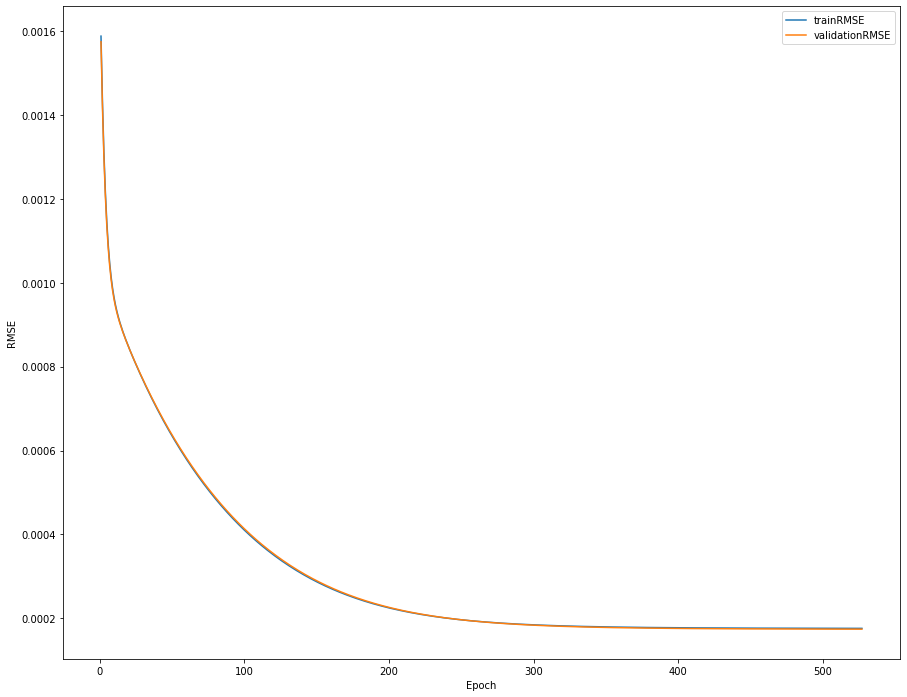

--- Total Training Time: 1.1859221458435059 (s) ---


In [17]:
import time
start_time = time.time() ## Records current time
RMSE_TL,RMSE_VL, Epoch_t = FBGD_001 (df_X_train_std.values,y_train,df_X_val_std.values,y_val, RMSE_val, 0.01)
plt.rcParams["figure.figsize"] = (15,12)
plt.plot(Epoch_t,RMSE_TL,label = "trainRMSE")
plt.plot(Epoch_t,RMSE_VL,label = "validationRMSE")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

Answer:

With fixed learning rate 0.01, the RMSE converges with a batch size over 64 for batch sizes that are powers of two. For smaller batch size, it takes fewer epoches to reach the Convergence Thresholds, the total training time is also shorter, but each epoch takes longer time for smaller batches.

In [18]:
def MBGD_001 (Xt,yt,Xv,yv, Batch_size, lr, CT):
  start_time = time.time()
  RMSE_tr = []
  RMSE_vl = []
  timelist = []
  RMSEGDV = 0.99
  EPOCH = []
  ecount = 1
  n,m = Xt.shape #n is the number of samples and m is number of features: fetaures include the bias as well (for this function)
  w = (np.random.random(m)/10000).reshape(1,-1)
  while 100> RMSEGDV > CT: # stops when converge or diverge too far
    data = np.hstack((Xt,yt))
    data = np.random.permutation(data) #shuffle the train data
    X_shuffled = data[:,0:m]
    y_shuffled = data[:,-1] 
    for i in range(0,n,Batch_size):
      if i+Batch_size <= n:
        X_mini = X_shuffled[i:i+Batch_size]
        y_mini = y_shuffled[i:i+Batch_size].reshape(-1,1)
      else:
        X_mini = X_shuffled[i:n]
        y_mini = y_shuffled[i:n].reshape(-1,1)

      yPmini= np.dot(X_mini,w.T).reshape (-1,1)
      gradient = (1/len(y_mini) * np.dot(X_mini.T, yPmini-y_mini)).reshape(1,-1)
      w = w - lr * gradient ### weight update
    yPtrain= np.dot(X_shuffled,w.T).reshape (-1,1)
    yPtest = np.dot(Xv,w.T).reshape (-1,1)
    RMSEGDT = rmse(yPtrain,y_shuffled)
    RMSEGDV = rmse(yPtest,yv)
    RMSE_tr.append(RMSEGDT)
    RMSE_vl.append(RMSEGDV)
    timelist.append(time.time()-start_time)
    EPOCH.append(ecount)
    ecount += 1
  if RMSEGDV < CT:
    fig, ax = plt.subplots(2,figsize = [15,10])
    ax[0].plot(EPOCH,RMSE_tr,label = "trainRMSE vs epoch Batch = %s" % Batch_size)
    ax[0].plot(EPOCH,RMSE_vl,label = "validationRMSE vs epoch Batch = %s" % Batch_size)
    ax[0].legend()
    ax[1].plot(timelist,RMSE_tr,label = "trainRMSE vs time Batch = %s" % Batch_size,marker = '*')
    ax[1].plot(timelist,RMSE_vl,label = "validationRMSE vs time Batch = %s" % Batch_size,marker = '*')
    ax[1].legend()
  #split the mini batches
  #iterate through train dataset get updated w
  #update validataion set with updated w
  #compute rmse for both train and val
  #stops when rmse val diverge or reach ct

  return w,RMSE_tr, RMSE_vl,timelist

In [19]:
df_X_train_std.shape

(9625, 41)

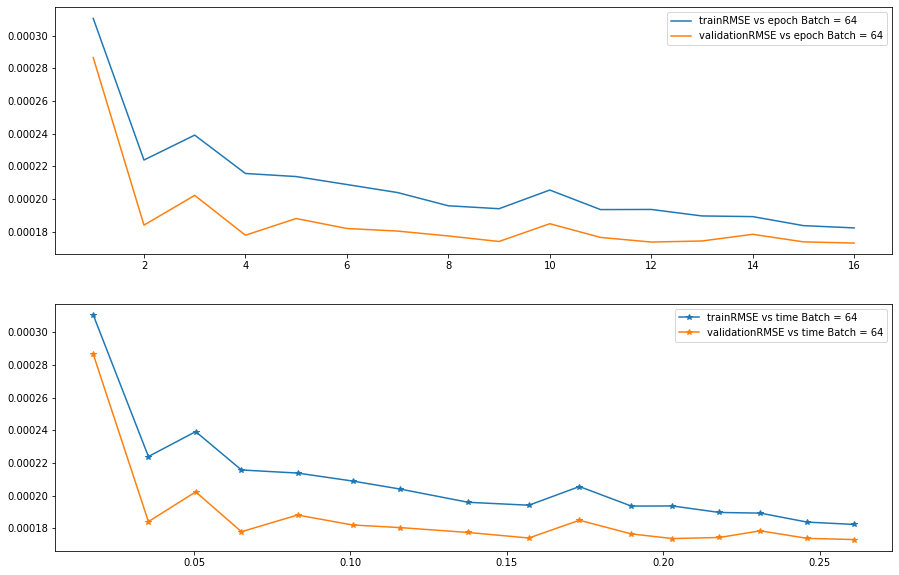

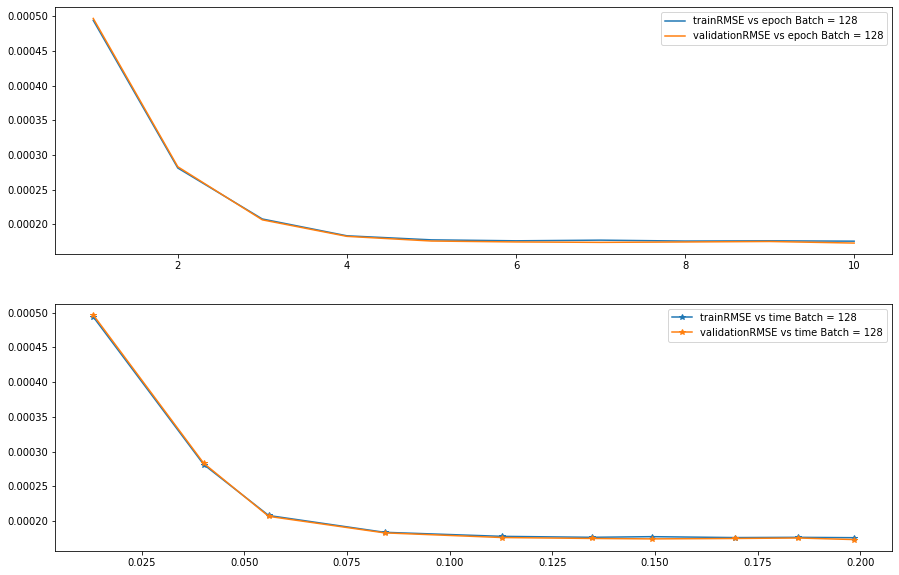

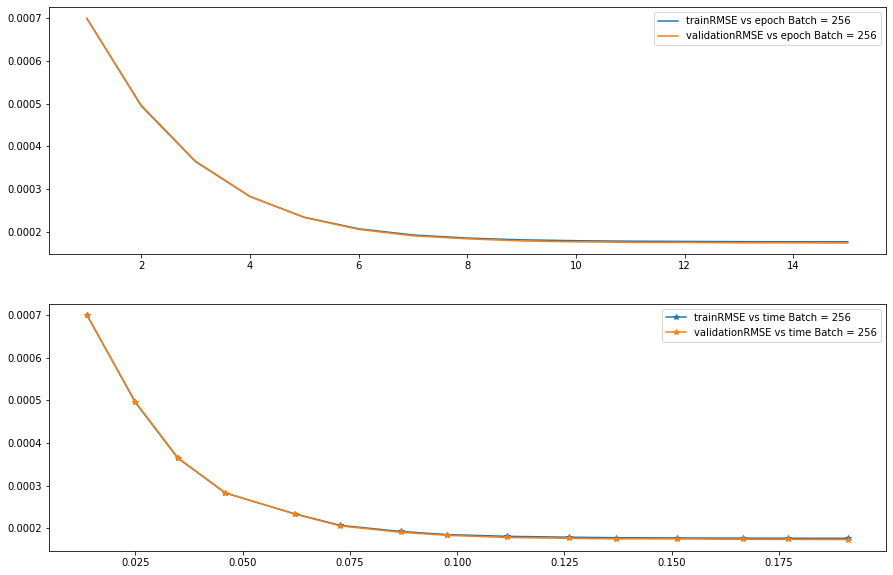

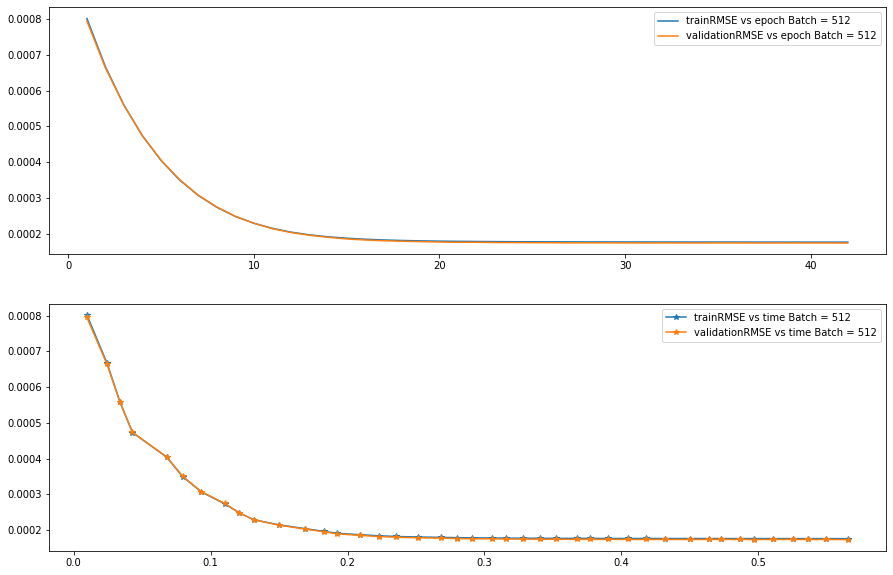

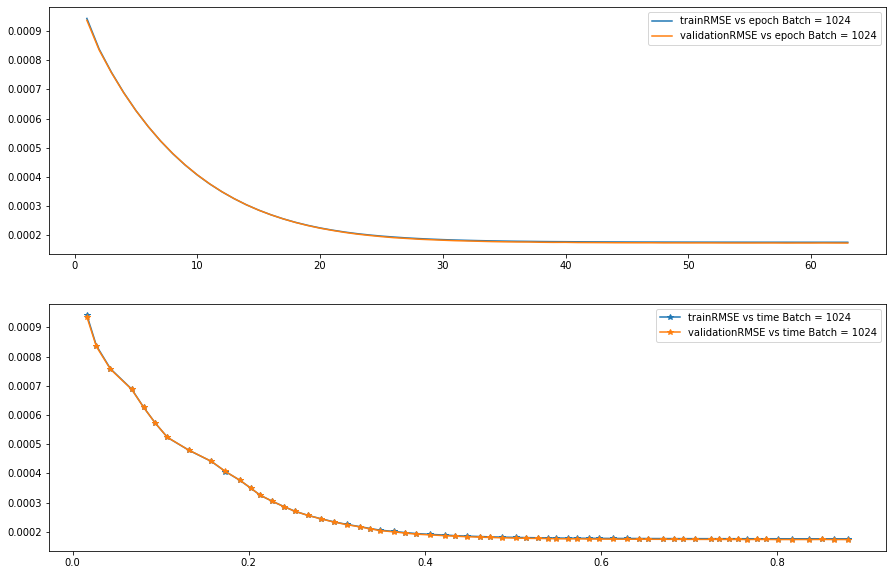

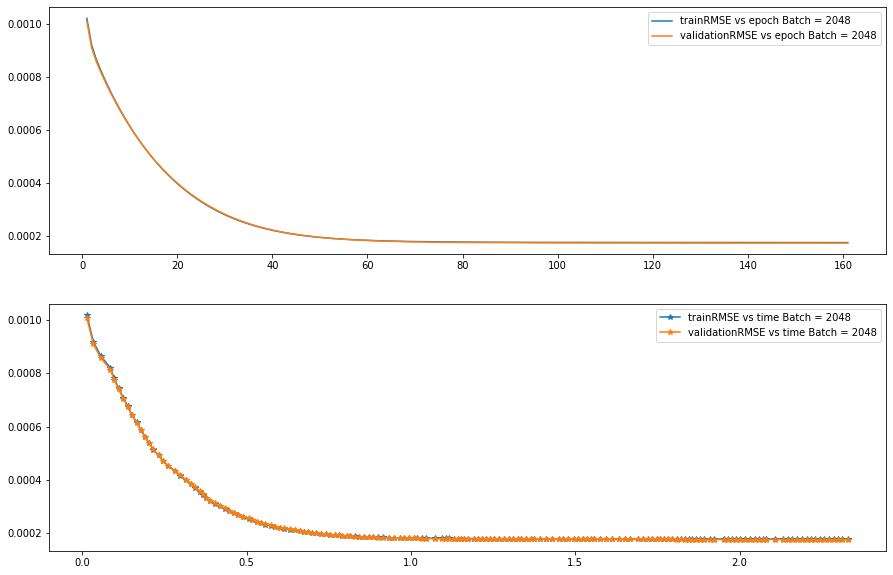

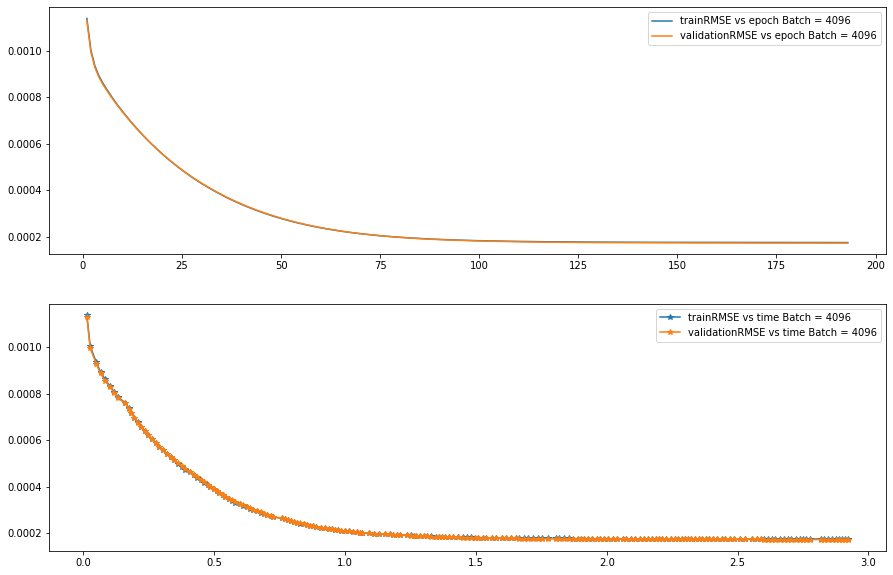

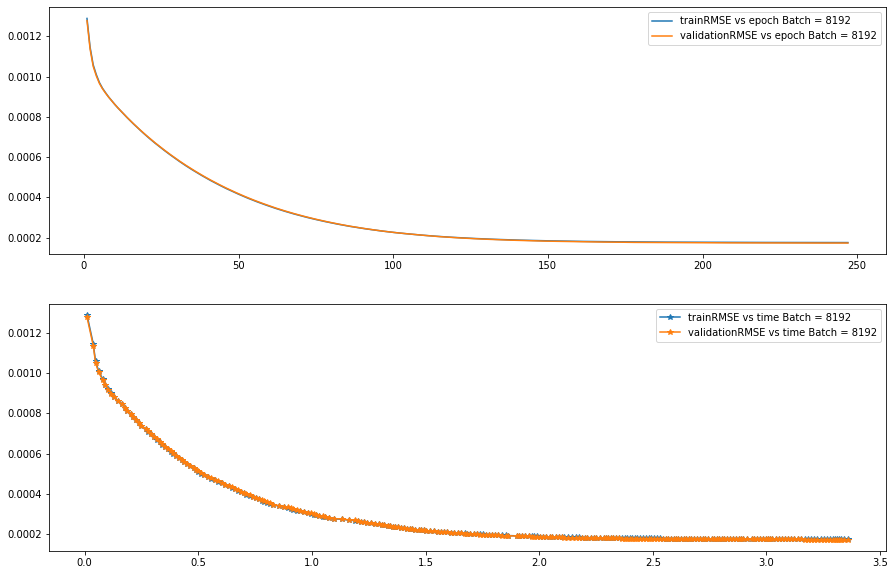

In [20]:
Batchsize = []
training_time = []
i = 1
while 2 ** i <= 9625: #sweep thourgh and plot 1,2 of the required plots
  start = time.time()
  Batchsize.append(2**i)
  MBGD_001 (df_X_train_std.values,y_train,df_X_val_std.values,y_val,Batch_size = 2 ** i, lr = 0.01, CT = RMSE_val*1.001)
  training_time.append(time.time()-start)
  i += 1

Text(0, 0.5, 'training time')

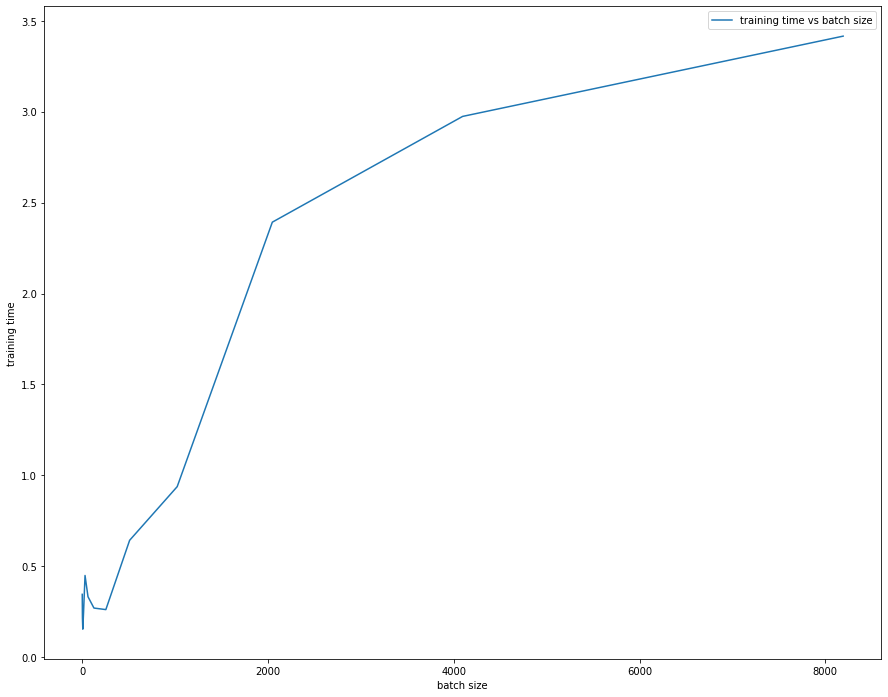

In [21]:
plt.plot(Batchsize, training_time, label = "training time vs batch size")
plt.legend()
plt.xlabel("batch size")
plt.ylabel("training time")

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batchsize that are not converging with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batchsize. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**

2. Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

  Answer: For the same batch size, when the learning rate is smaller, it takes more epoches and longer training time for the RMSE to converge. 

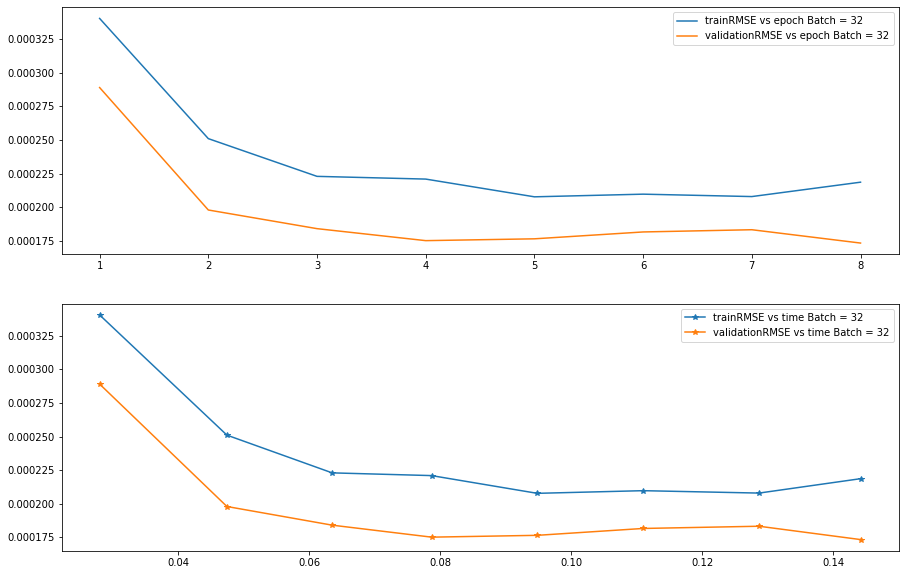

In [35]:
# For batch size 32
w, RMSET32,RMSEV32,ET32 = MBGD_001 (df_X_train_std.values,y_train,df_X_val_std.values,y_val,Batch_size = 32, lr = 0.005, CT = RMSE_val*1.001)

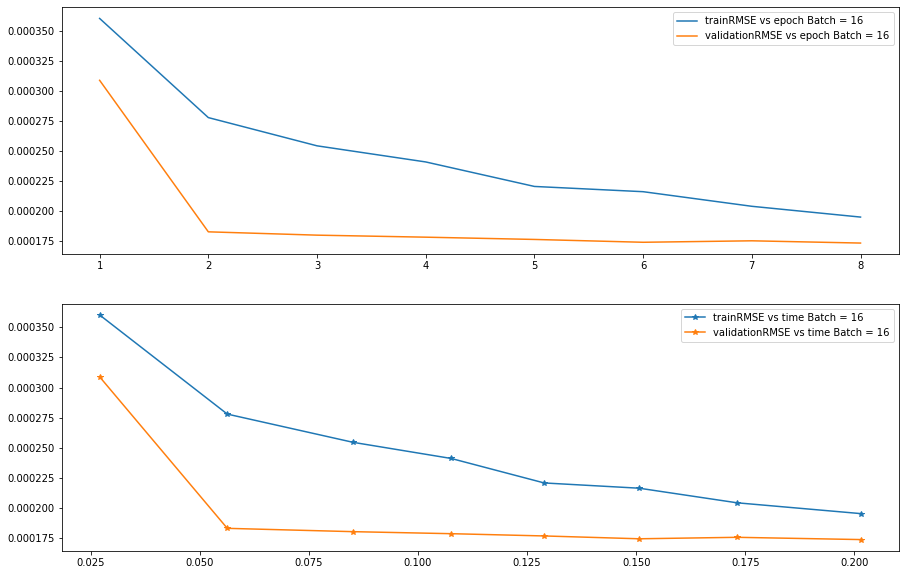

In [47]:
# For batch size 16
w, RMSET16,RMSEV16,ET16 = MBGD_001 (df_X_train_std.values,y_train,df_X_val_std.values,y_val,Batch_size = 16, lr = 0.0025, CT = RMSE_val*1.001)

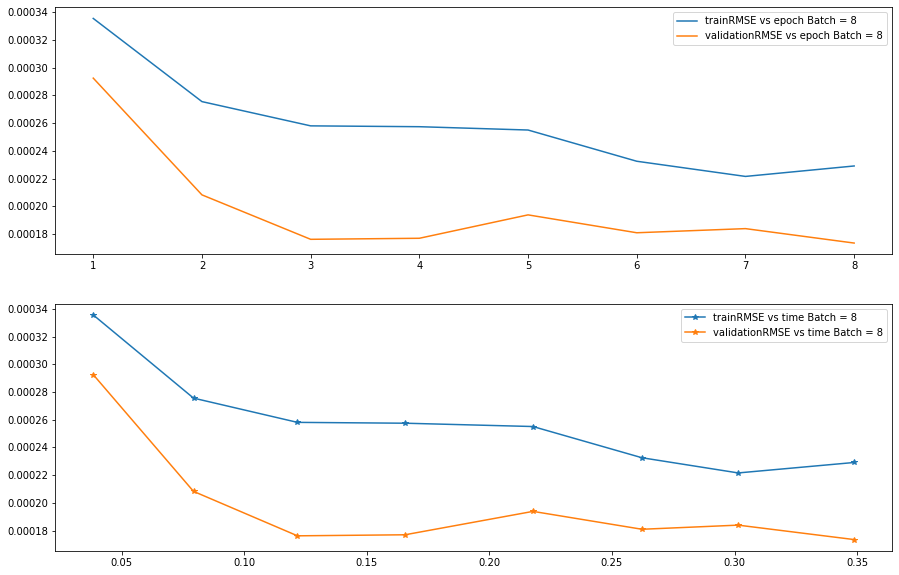

In [24]:
# For batch size 8
w, RMSET8,RMSEV8,ET8 = MBGD_001 (df_X_train_std.values,y_train,df_X_val_std.values,y_val,Batch_size = 8, lr = 0.00125, CT = RMSE_val*1.001)

In [48]:
rmsec = np.array((RMSET32,RMSEV32,RMSET16,RMSEV16,RMSET8,RMSEV8))
rmsec

array([[0.00034045, 0.00025102, 0.00022294, 0.00022092, 0.00020772,
        0.0002097 , 0.00020791, 0.00021861],
       [0.00028902, 0.00019792, 0.00018404, 0.00017512, 0.00017647,
        0.00018158, 0.00018324, 0.00017332],
       [0.00036038, 0.00027789, 0.0002544 , 0.00024099, 0.00022061,
        0.00021625, 0.0002041 , 0.00019513],
       [0.00030891, 0.00018286, 0.00018009, 0.00017841, 0.00017653,
        0.00017417, 0.00017539, 0.00017352],
       [0.00033555, 0.00027559, 0.0002581 , 0.0002575 , 0.0002551 ,
        0.00023259, 0.00022165, 0.00022919],
       [0.00029252, 0.00020835, 0.00017631, 0.00017706, 0.00019393,
        0.00018104, 0.00018402, 0.00017361]])

In [49]:
from numpy.lib.shape_base import column_stack
summary = pd.DataFrame(rmsec)
summary.index = ['RMSEtrain BS = 32 lr = 0.005','RMSEval BS = 32 lr = 0.005','RMSEtrain BS = 16 lr = 0.0025','RMSEval BS = 16 lr = 0.0025','RMSEtrain BS = 8 lr = 0.00125','RMSEval BS = 8 lr = 0.00125']
summary

,0,1,2,3,4,5,6,7
RMSEtrain BS = 32 lr = 0.005,0.000340,0.000251,0.000223,0.000221,0.000208,0.000210,0.000208,0.000219
RMSEval BS = 32 lr = 0.005,0.000289,0.000198,0.000184,0.000175,0.000176,0.000182,0.000183,0.000173
RMSEtrain BS = 16 lr = 0.0025,0.000360,0.000278,0.000254,0.000241,0.000221,0.000216,0.000204,0.000195
RMSEval BS = 16 lr = 0.0025,0.000309,0.000183,0.000180,0.000178,0.000177,0.000174,0.000175,0.000174
RMSEtrain BS = 8 lr = 0.00125,0.000336,0.000276,0.000258,0.000257,0.000255,0.000233,0.000222,0.000229
RMSEval BS = 8 lr = 0.00125,0.000293,0.000208,0.000176,0.000177,0.000194,0.000181,0.000184,0.000174


In [50]:
def MBGD_movinglr (Xt,yt,Xv,yv, Batch_size, lr, CT):
  start_time = time.time()
  RMSE_tr = []
  RMSE_vl = []
  timelist = []
  RMSEGDV = 0.99
  EPOCH = []
  ecount = 1
  n,m = Xt.shape #n is the number of samples and m is number of features: fetaures include the bias as well (for this function)
  w = (np.random.random(m)/10000).reshape(1,-1)
  while 100> RMSEGDV > CT: # stops when converge or diverge too far
    
    data = np.hstack((Xt,yt))
    data = np.random.permutation(data) #shuffle the train data
    X_shuffled = data[:,0:m]
    y_shuffled = data[:,-1] 
    for i in range(0,n,Batch_size):
      if i+Batch_size <= n:
        X_mini = X_shuffled[i:i+Batch_size]
        y_mini = y_shuffled[i:i+Batch_size].reshape(-1,1)
      else:
        X_mini = X_shuffled[i:n]
        y_mini = y_shuffled[i:n].reshape(-1,1)

      yPmini= np.dot(X_mini,w.T).reshape (-1,1)
      gradient = (1/len(y_mini) * np.dot(X_mini.T, yPmini-y_mini)).reshape(1,-1)
      w = w - lr * gradient ### weight update
    yPtrain= np.dot(X_shuffled,w.T).reshape (-1,1)
    yPtest = np.dot(Xv,w.T).reshape (-1,1)
    RMSEGDT = rmse(yPtrain,y_shuffled)
    RMSEGDV = rmse(yPtest,yv)
    RMSE_tr.append(RMSEGDT)
    RMSE_vl.append(RMSEGDV)
    timelist.append(time.time()-start_time)
    EPOCH.append(ecount)
    ecount += 1

  return RMSE_tr, RMSE_vl,timelist,EPOCH

In [51]:
# Best batchsize in part 4 is 64
RMSET = {}
RMSEV = {}
ET = {}
EPOCH = {}
lr = 0.001
lrl = []
for i in range(10):
  lr = 0.001 - i *0.0001
  lrl.append(lr)
  RMSET[i],RMSEV[i],ET[i],EPOCH[i] = MBGD_movinglr(df_X_train_std.values,y_train,df_X_val_std.values,y_val,Batch_size = 64, lr = lr, CT = RMSE_val*1.001)


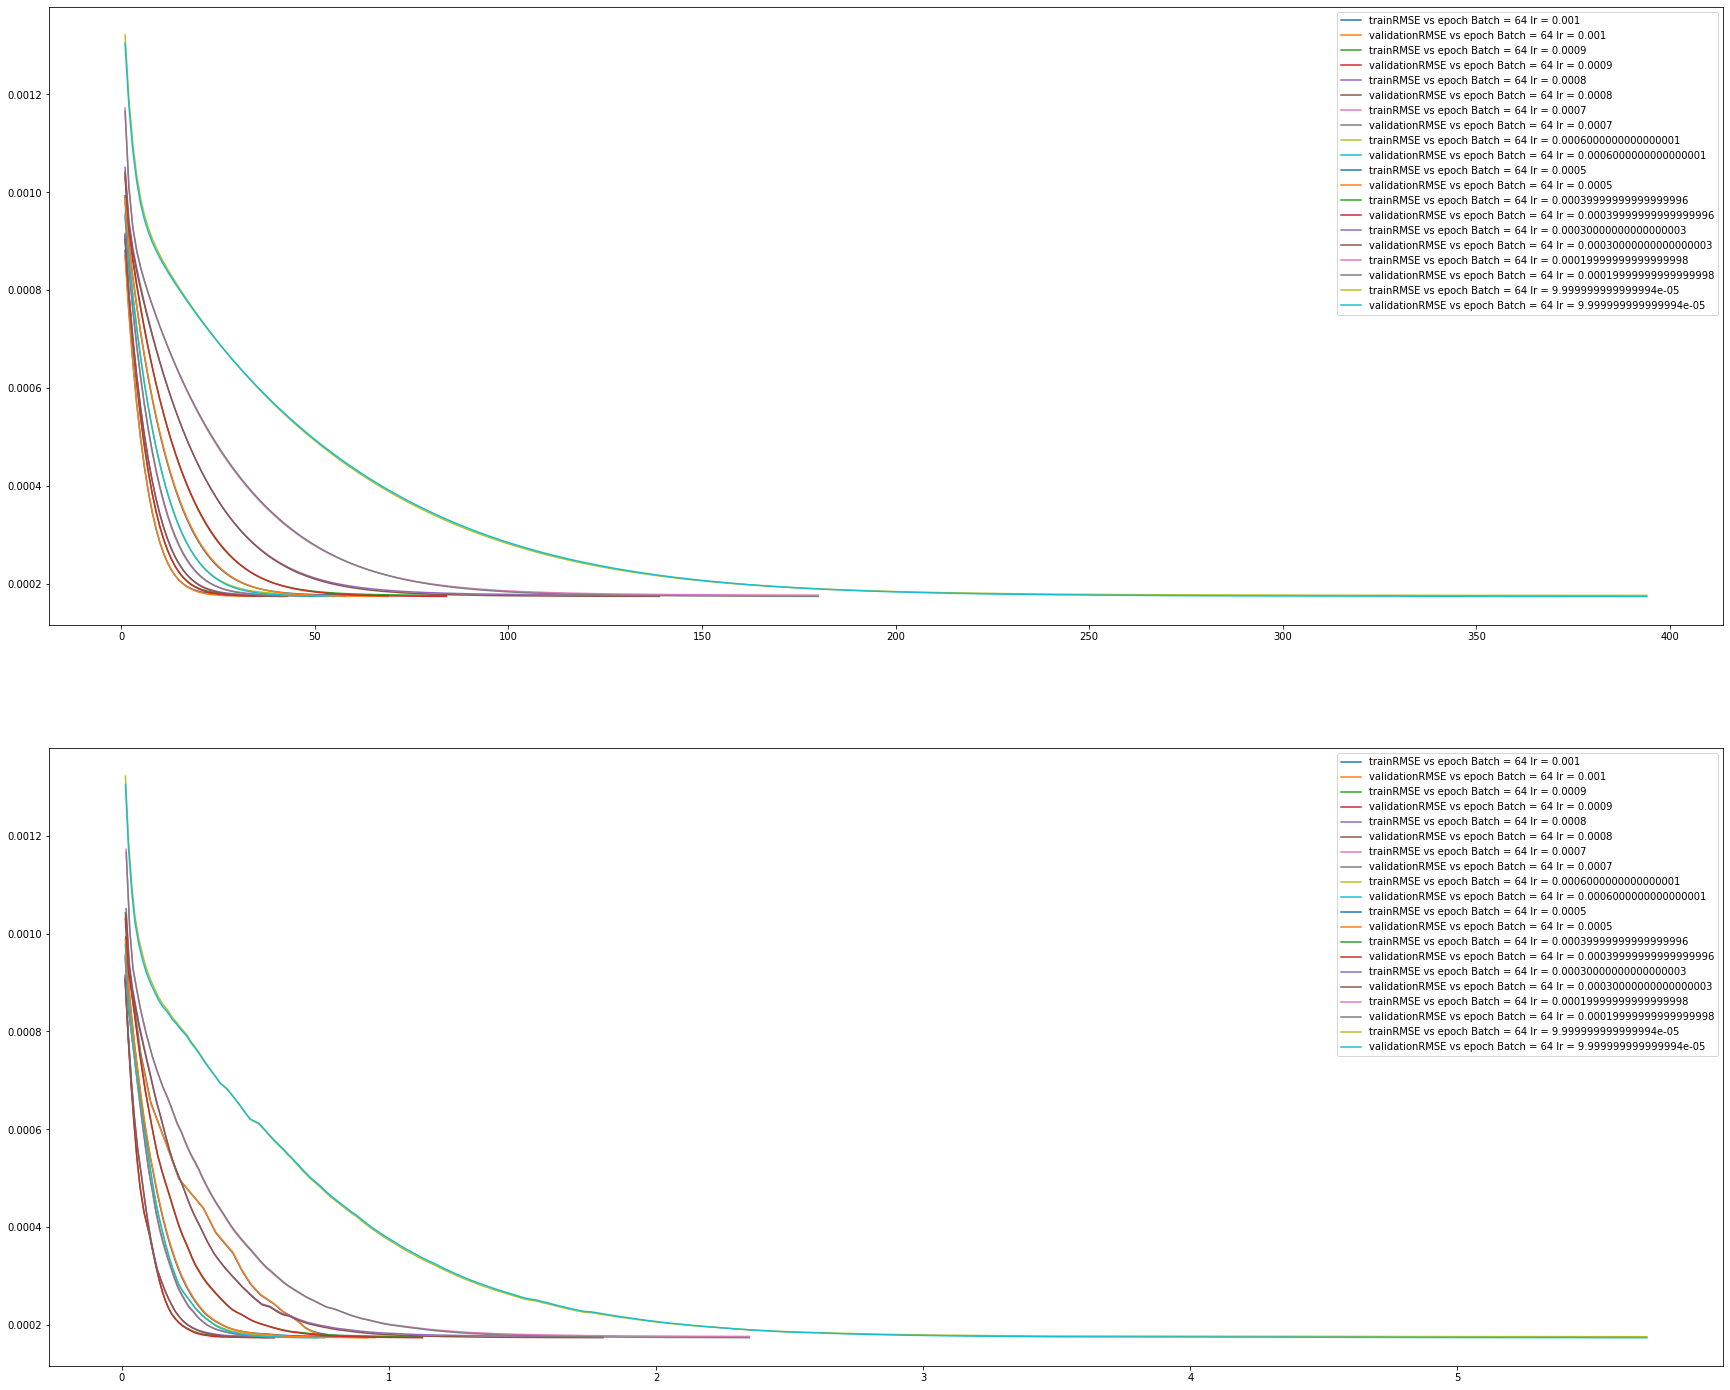

In [52]:
fig, ax = plt.subplots(2,figsize = [30,25])
ax[0].plot(EPOCH[0],RMSET[0],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[0])
ax[0].plot(EPOCH[0],RMSEV[0],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[0])
ax[0].plot(EPOCH[1],RMSET[1],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[1])
ax[0].plot(EPOCH[1],RMSEV[1],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[1])
ax[0].plot(EPOCH[2],RMSET[2],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[2])
ax[0].plot(EPOCH[2],RMSEV[2],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[2])
ax[0].plot(EPOCH[3],RMSET[3],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[3])
ax[0].plot(EPOCH[3],RMSEV[3],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[3])
ax[0].plot(EPOCH[4],RMSET[4],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[4])
ax[0].plot(EPOCH[4],RMSEV[4],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[4])
ax[0].plot(EPOCH[5],RMSET[5],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[5])
ax[0].plot(EPOCH[5],RMSEV[5],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[5])
ax[0].plot(EPOCH[6],RMSET[6],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[6])
ax[0].plot(EPOCH[6],RMSEV[6],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[6])
ax[0].plot(EPOCH[7],RMSET[7],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[7])
ax[0].plot(EPOCH[7],RMSEV[7],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[7])
ax[0].plot(EPOCH[8],RMSET[8],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[8])
ax[0].plot(EPOCH[8],RMSEV[8],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[8])
ax[0].plot(EPOCH[9],RMSET[9],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[9])
ax[0].plot(EPOCH[9],RMSEV[9],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[9])
ax[0].legend()
ax[1].plot(ET[0],RMSET[0],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[0])
ax[1].plot(ET[0],RMSEV[0],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[0])
ax[1].plot(ET[1],RMSET[1],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[1])
ax[1].plot(ET[1],RMSEV[1],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[1])
ax[1].plot(ET[2],RMSET[2],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[2])
ax[1].plot(ET[2],RMSEV[2],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[2])
ax[1].plot(ET[3],RMSET[3],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[3])
ax[1].plot(ET[3],RMSEV[3],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[3])
ax[1].plot(ET[4],RMSET[4],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[4])
ax[1].plot(ET[4],RMSEV[4],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[4])
ax[1].plot(ET[5],RMSET[5],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[5])
ax[1].plot(ET[5],RMSEV[5],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[5])
ax[1].plot(ET[6],RMSET[6],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[6])
ax[1].plot(ET[6],RMSEV[6],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[6])
ax[1].plot(ET[7],RMSET[7],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[7])
ax[1].plot(ET[7],RMSEV[7],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[7])
ax[1].plot(ET[8],RMSET[8],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[8])
ax[1].plot(ET[8],RMSEV[8],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[8])
ax[1].plot(ET[9],RMSET[9],label = "trainRMSE vs epoch Batch = 64 lr = %s" % lrl[9])
ax[1].plot(ET[9],RMSEV[9],label = "validationRMSE vs epoch Batch = 64 lr = %s" % lrl[9])
ax[1].legend()

  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

  Answer: For the same batch size, when the learning rate is smaller, it takes more epoches and longer training time for the RMSE to converge. 

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Answer: The lowest total training time for the RMSE to converge occurs with batchsize = 32 lr = 0.005 with a Convergence threshold of 0.00017378234165667215

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

Answer: With the linear regression by minibatch gradient descent model, the goal can be predicted with the root mean squire error of lower than 0.00017378234165667215 within 0.15 second. The training time and epoches will vary each time running the model because of the initial w generated is random vector. Given that the CT chosen is 1.001 times rmse for the validation dataset with direct solution, this final model chosen is both accurate and fast.

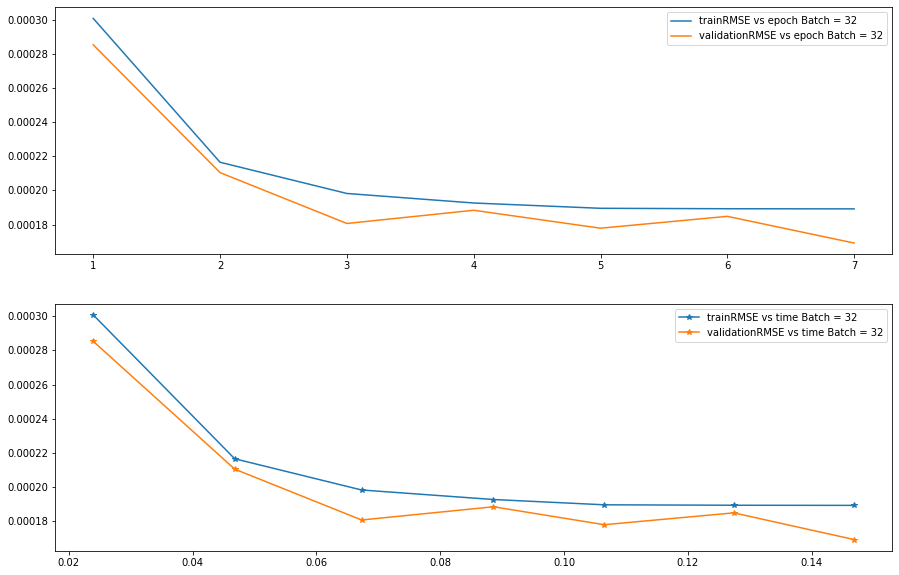

In [53]:
# The lowest total training time for the RMSE to converge occurs with batchsize = 32 lr = 0.005
w_final, RMSET_final, RMSETV_final, traintime_final = MBGD_001 (df_X_train_std.values,y_train,df_X_test_std.values,y_test,Batch_size = 32, lr = 0.005, CT = RMSE_val*1.001)

## Part 7 - Getting started with Github  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 6. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/5dxrAjOj to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS-1070-2021/project4_git-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS-1070-2021/project4_git-*********
```


 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project4_git-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add W22_Project_4_git.ipynb
git commit -m “Final Submission”
git push 
```
If you had any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or 
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.** 

**Private Repository Link :** https://github.com/APS-1070-2021/project4_git-xzq715487899 **[3 marks]**